Summary Statistics:
                  count          mean           std    min    25%       50%  \
Balance        10000.0  76485.889288  62397.405202    0.0    0.0  97198.54   
CreditScore    10000.0    650.528800     96.653299  350.0  584.0    652.00   
NumOfProducts  10000.0      1.530200      0.581654    1.0    1.0      1.00   

                     75%        max    Median  Skewness  Kurtosis  
Balance        127644.24  250898.09  97198.54 -0.141088 -1.489267  
CreditScore       718.00     850.00    652.00 -0.071596 -0.426113  
NumOfProducts       2.00       4.00      1.00  0.745456  0.582089  


<ipython-input-8-f93727f02192>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")
<ipython-input-8-f93727f02192>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Geography", data=df, palette="Set1")


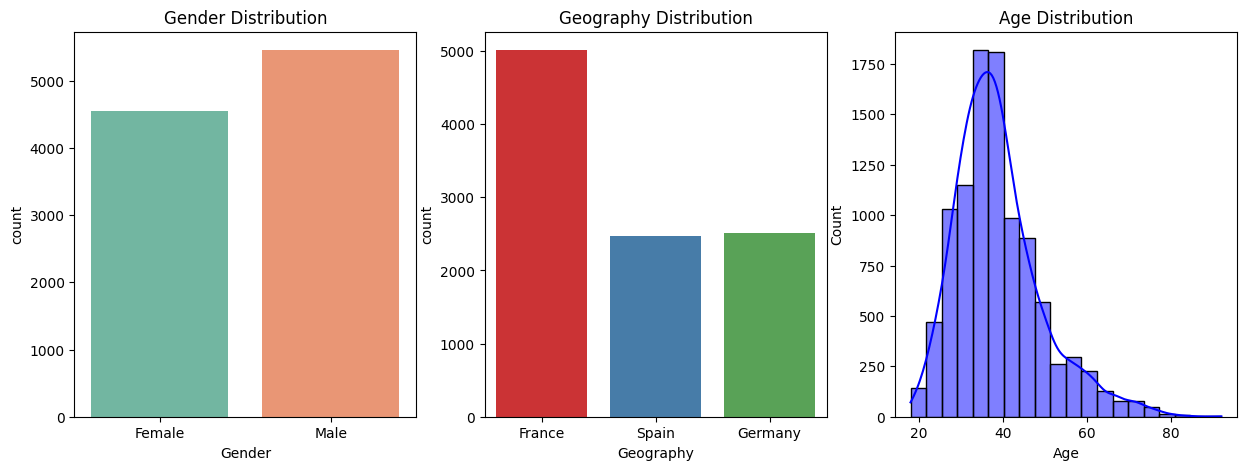

NumOfProducts Statistics:
           Min  Max   Average
Active      1    3  1.544210
Inactive    1    4  1.475466


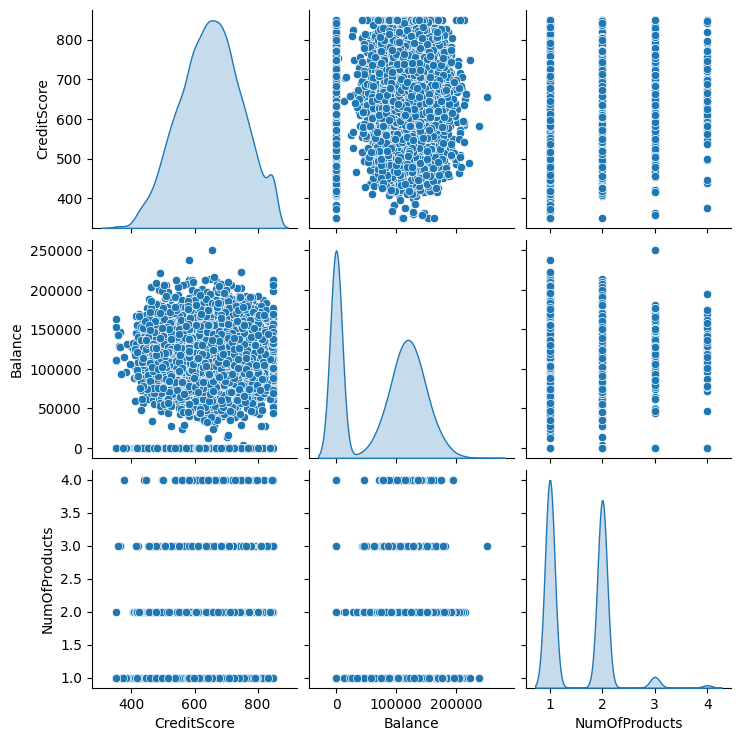

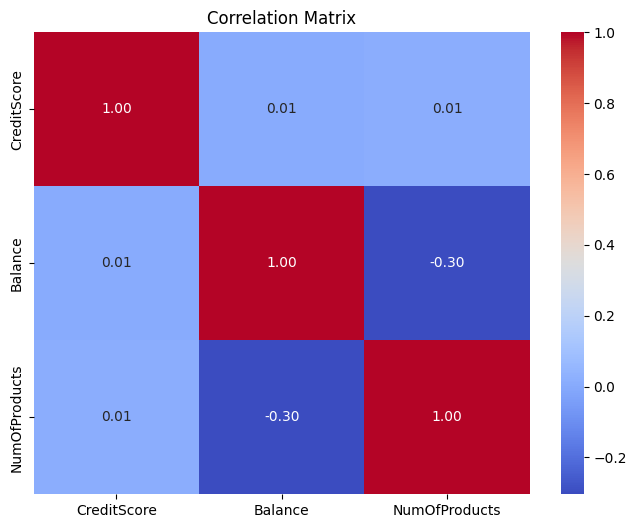

<ipython-input-8-f93727f02192>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="Balance", data=df, palette="Set3")
<ipython-input-8-f93727f02192>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="NumOfProducts", data=df, palette="Set2")


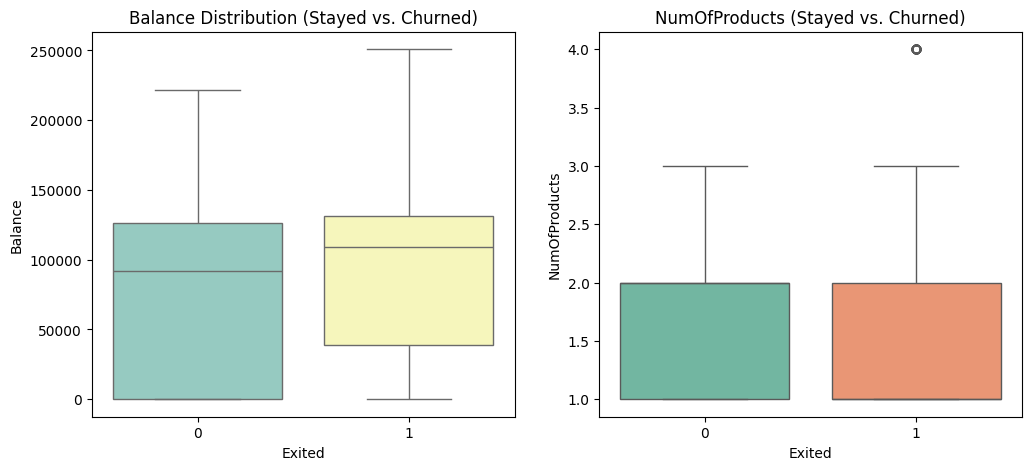

Probability of low credit score & high balance: 0.0638


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load dataset
df = pd.read_csv("/content/archive (2).zip")  # Replace with actual filename

# Summary statistics (Balance, Credit Score, NumOfProducts)
numeric_cols = ["Balance", "CreditScore", "NumOfProducts"]
summary_stats = df[numeric_cols].describe().T
summary_stats["Median"] = df[numeric_cols].median()
summary_stats["Skewness"] = df[numeric_cols].apply(skew)
summary_stats["Kurtosis"] = df[numeric_cols].apply(kurtosis)
print("Summary Statistics:\n", summary_stats)

# Distribution of customers by Gender, Geography, and Age
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.subplot(1, 3, 2)
sns.countplot(x="Geography", data=df, palette="Set1")
plt.title("Geography Distribution")
plt.subplot(1, 3, 3)
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

# Min, Max, and Avg NumOfProducts (Active vs. Inactive Customers)
active = df[df["Exited"] == 0]
inactive = df[df["Exited"] == 1]
product_stats = pd.DataFrame({
    "Min": [active["NumOfProducts"].min(), inactive["NumOfProducts"].min()],
    "Max": [active["NumOfProducts"].max(), inactive["NumOfProducts"].max()],
    "Average": [active["NumOfProducts"].mean(), inactive["NumOfProducts"].mean()]
}, index=["Active", "Inactive"])
print("NumOfProducts Statistics:\n", product_stats)

# Relationship between Credit Score, Balance, and NumOfProducts
sns.pairplot(df[["CreditScore", "Balance", "NumOfProducts"]], diag_kind="kde")
plt.show()

correlation_matrix = df[["CreditScore", "Balance", "NumOfProducts"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Differences in Balance & NumOfProducts (Stayed vs. Churned Customers)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="Exited", y="Balance", data=df, palette="Set3")
plt.title("Balance Distribution (Stayed vs. Churned)")
plt.subplot(1, 2, 2)
sns.boxplot(x="Exited", y="NumOfProducts", data=df, palette="Set2")
plt.title("NumOfProducts (Stayed vs. Churned)")
plt.show()

# Probability of a customer having a low credit score and a high balance
low_credit_threshold = df["CreditScore"].quantile(0.25)
high_balance_threshold = df["Balance"].quantile(0.75)
low_credit_high_balance = df[(df["CreditScore"] <= low_credit_threshold) & (df["Balance"] >= high_balance_threshold)]
probability = len(low_credit_high_balance) / len(df)
print(f"Probability of low credit score & high balance: {probability:.4f}")
